# System resilience

*What distinguishes biological systems from physical ones? - Biological systems perform computations.*

Write "In this chapter, you will learn:"
Example of system resilience problem


At some point of accumulating evidences about object of study we stop just speculating about its properties and start mathematical modelling. 

**Done**
* Recap differential equations
    * linear ODE
    * nonlinear ODE
    * numerical integration
* Stability theory and bifurcations
    * Stability intuition (as in Sole Lecture)
    * Types of bifurcations (see the book) (or Catastrophic bifurcation and criticality), bifurcation diagram
    * Example of system

**Plan**
* System ODE
    * Stability in linear multidimensional case (MODELING GENE EXPRESSION WITH DIFFERENTIAL EQUATIONS)
    * Nonlinear systems (Gene regulatory networks, Michaelis-Menten equation)
    * Univesality principle (just reproduce the paper with simplifications)
    * Example complex system aging (gene regulatory network) (just adjust some parameters in the network reflecting aging) 
* Critical slowing down
    * real data case
    * construct resilience indicator from data?
    * fitting a stochastic differential equation from data?
    * resilience analysis and maximal theoretical lifespan prediction.


## Recap differential equations

Differential equation is a very useful instrument for understanding and modeling real biological processes. Once you develop a basic intuition on differential equation you will see the world as a set of dynamic systes. What is a dynamic systems? Well, everything! Everything what we may observe evolving in time could be (and possibly must be) described with this instrument.

In general, a differential equation is written as

$$
  \dot{x} = f(x, t)
$$ (diff_eq)

where f(x, t) - given function of time $t$ and state variable $x$ itself. Note, that $x=x(t)$ is also a function of time, hence, $\dot{x} = dx(t)/dt = dx/dt$ - we omit $(t)$ for simplicity. A huge body of knowledge of differential equations theory has been elaborated for ages. In this tutorial we only touch the most important topics needed for understanding complex systems resilience introduced in the previous chapter.

### Linear ordinary differential equations

First, let's start from the most simplest cases of so called growth/death models. Let:

$$ 
    \dot{x} = a 
$$

here $a$ is a constant;

$$ 
    \frac{dx}{dt} = a 
$$
$$ 
    dx = a\cdot dt 
$$

integrate both sides,

$$ 
    \int dx = a \int dt 
$$
$$
    x(t) = at + C
$$ (ex_sol_1)

where constant $C$ is defined from initial conditions. This is the simplest case of separable equation (s.t. you can separate variable $x$ from $t$ on both sides) describes **linear growth** of $x$. For example, the amount of water accumulated in water tank fed by pipe. The next case:

$$ 
    \dot{x} = ax 
$$
$$ 
    \int \frac{dx}{x} = a\int dt 
$$
$$ 
    \ln(x(t)) = at + C
$$
$$ 
    x(t) = e^Ce^{at} = C_1e^{at}
$$ (ex_sol_2)

This equation describes dynamis of so called **exponential growth/death** depending on the sign of the coeffcicient $a$. One common example of a system described by this equation is a number of bacteria in a petri dish in case when resources for the growth are unlimited. Indeed, you know that number of bacteria next day depends on the number of bacteria on the previous day. Thus, the differential equation has the form $\dot{x} = ax$ and has a solution in a form of exponential growth.

Let's draw the solutions {eq}`ex_sol_1`, {eq}`ex_sol_2`.  

In [231]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '16' # increase font size

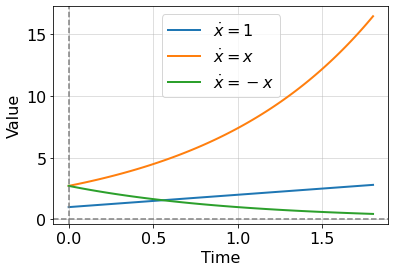

In [232]:
x1 = lambda t, a, C: a*t + C
x2 = lambda t, a, C: np.exp(a*t) * np.exp(C)

t = np.linspace(0, 1.8, 100)
C = 1

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.plot(t, x1(t, 1, C), label='$\dot{x} = 1$', lw=2);
ax.plot(t, x2(t, 1, C), label='$\dot{x} = x$', lw=2);
ax.plot(t, x2(t, -1, C), label='$\dot{x} = -x$', lw=2);
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend();

Two important observations: (1) the solution of equation {eq}`ex_sol_1` is always diverges, i.e there is no non-zero constant $Const$ such that $x(\infty) \to Const$; (2) the solution of equation {eq}`ex_sol_2` has three regimes: one at positive constant $a$ - divergence (exponential growth), one at negative $a$ - convergence to zero (exponential decay), and one at $a=0$ - trivial case with no dynamics. Adjusting constant $a$ continiously leads to switching between regimes which is something that we call **bifurcation** and will study in further. In other words. they say a system undergoes a bifurcation as $a$ approaches to zero (from left or right side). Of course, in this case that the system changes its behavior **qualitatively**.

### Non-linear ordinary differential equations

Linear differential equations and systems of them porvides a lot of possibilities for modelling technical and living systems. However, already in case of bacteria growth modeling with limited resources we force the need to use quadratic models. This is where logistic model appears:

$$ 
    \dot{x} = rx(1 - \frac{x}{K}) 
$$

here we introduced two additional parameters: $r$ - growth rate, and $K$ - carrying capacity. To understand this equation deeper let's rewrite it in expanded form:

$$ 
    \dot{x} = rx - \frac{rx^2}{K} =  rx - \delta x^2
$$

The first term is a growth term responsible for the increase of number of bacteria with rate $r$. The second term is more tricky and suddenly quadratic with a new parameter $\delta = r/K$ which is interpreted as death rate. The idea of second term is that after $x$ becomes quite large number the growth must rapidly slow down modelling, thus, a deficit of resources. The good idea to use for that a quadratic term which increases faster than linear and not so hard for computation. But the right question here is: "why not cubic or exponent or something else?". It turns out that the quadratic term is a good approximation of the behavior of real-world cases of growth. One additional intuition behind quadratic term is that it reflects pairwise interactions of $x$ species, which can we may interpret as a competition for resources (aka crowding pressure).

Let's solve it:

$$ 
    \frac{dx}{dt} = rx(1 - \frac{x}{K}) 
$$
$$ 
    \frac{dx}{x(1 - \frac{x}{K}) } = rdt
$$

split left part by sum of fractions with some unknown (yet) coefficients $A$ and $B$:

$$ 
    \frac{Adx}{x} + \frac{Bdx}{(1 - \frac{x}{K}) } = rdt
$$

consider the following equation for the nominator:

$$ 
    A(1 - \frac{x}{K})dx + Bxdx = dx
$$
$$ 
    A(1 - \frac{x}{K}) + Bx = 1
$$
$$ 
    A - A\frac{x}{K} + Bx = 1
$$
$$ 
    A - x(\frac{A}{K} + B) = 1
$$

from the obtained equation we can compose the following system:

$$
\begin{cases}
    -\frac{A}{K} + B = 0 \rightarrow B = \frac{A}{K}\\
    A = 1\\
\end{cases}
$$

Thus, we have

$$ 
    \frac{dx}{x} + \frac{\frac{1}{K}dx}{(1 - \frac{x}{K}) } = rdt
$$
$$ 
    \int\frac{dx}{x} + \frac{1}{K}\int\frac{dx}{(1 - \frac{x}{K}) } = \int rdt
$$
$$ 
    \ln(x) - \ln(1 - \frac{x}{K}) = rt + C
$$
$$ 
    \ln(\frac{x}{1 - \frac{x}{K}}) = rt + C
$$
$$ 
    \frac{x}{1 - \frac{x}{K}} = C_1e^{rt}
$$

It is easy to see that $C_1$ can be computed from initial value problem (at $t=0$) as following:

$$ 
    C_1 = \frac{x_0}{1 - \frac{x_0}{K}} = \frac{Kx_0}{K - x_0}
$$

where $x_0 = x(t=0)$ correspondingly. After expressing $x$ from the integral above have:

$$ 
    x(t) = \frac{K}{1 + \frac{K - x_0}{x_0}e^{-rt}}
$$ (ex_sol_3)

What regimes are possible for this solution? Let's suppose that carrying capacity $K=1$, initial population $x_0=0.5$ and explore graphically the dynamics at different $r$:

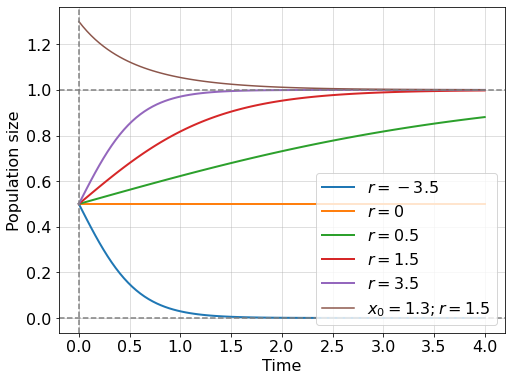

In [233]:
x3 = lambda t, K, r, x0: K / (1 + (K - x0) / x0 * np.exp(-r * t))

t = np.linspace(0, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Time')
ax.set_ylabel('Population size')
for r in [-3.5, 0, 0.5, 1.5, 3.5]:
    ax.plot(t, x3(t, 1, r, 0.5), label=f'$r = {r}$', lw=2);

ax.plot(t, x3(t, 1, 1.5, 1.3), label=f'$x_0 = 1.3; r = 1.5$'); # another initial condition
ax.axhline(0, color='grey', ls='--')
ax.axhline(1, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='lower right');

Excellent! We solved a new kind of dynamical system describing bacterial growth with limited resources. As before we observe three different regimes for $r>0$ - logistic growth; $r=0$ - no dynamics; $r<0$ - logistic decay (not exponential!). But we also see something new, our solutions for growth are bounded with carrying capacity $K=1$ and, for all initial conditions (even for larger than $K$), trajectories *attracts* to a fixed value $K$ which is called **attractor**. In the next chapter we will address more to attractors, but before that, we need to learn what to do with non-integrable non-linear differential equations.

```{admonition} Exercise
:class: dropdown
What kind of growth exhibits equation $\dot{x} = a*x^2$? Solve the equation for positive $a$ and $x_0 > 0$. What wrong with this equation if we would try it for modeling real systems growth? What is the name of this model (try to google or chatGPT it)?
```

### Numerical integration

The class of integrable differential equation is very small, even so they are extremely useful for describing complex systems dynamics. In some cases, however, you may develop more sophisticated model of a process under study and the corresponding differential equation does not have a closed form solution. What can we do in this case? Consider the following complication of the logistic model:

$$
    \dot{x} = r(t) (x  - \frac{x^2}{K(t)})  =  r_0 sin^2(t) (x  - \frac{x^2}{1 + \sqrt{t}})
$$ (eq_complex_logistic)

now our logistic model contains two additional assumptions: (i) the growth rate changes as a sinusoidal function of time $r = r(t) = r_0 sin^2(t)$ - this models a photo-sensitivity of bacteria allowing them to reproduce effectively in day time with maximum growth rate or $r_0$; (ii) the carrying capacity slowly increases with time by square root law starting from 1, namely $K = K(t) = 1 + \sqrt{t}$. You can check that this new differential equation is non-integrable in elementary functions, so we need to obtain solution **numerically**.

We introduce **Forward-Euler** scheme of integration. without going into the details of the proof, forward Euler prescribes just to iteratively compute each next step as a sum of result from the previous step and computed value of the function on the previous step. Let's rewrite our new logistic equation {eq}`eq_complex_logistic` in the general form:

$$
  \frac{dx}{dt} = f(x, t)
$$ 

rewrite the differetial equation in finite-difference form:

$$
  \frac{\Delta x}{\Delta t} = \frac{x_i - x_{i-1}}{\Delta t} = f(x_{i-1}, t_{i-1})
$$ 

expressing $x_i$ from the latter have:

$$
  x_i = x_{i-1} + f(x_{i-1}, t_{i-1})\Delta t 
$$ 

We did it! We have a clear iterative scheme for integrating our system. Let's code it, assuming that $x_0 = 0.5$:

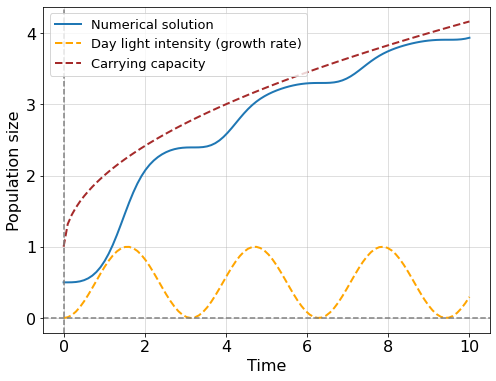

In [234]:
f = lambda x, t, r0: r0 * np.sin(t)**2 * (x - x**2 / (1 + np.sqrt(t)))

n = 100 # number of integration steps
t = np.linspace(0, 10, n)
dt = t[1] - t[0] #time difference
r0 = 3
x0 = 0.5
x = np.empty(n) #resulting integral
x[0] = x0 # assign initial condition

for i in range(1, n): #integrate from 1-st index
    x[i] = x[i-1] + f(x[i-1], t[i-1], r0) * dt

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Time')
ax.set_ylabel('Population size')
ax.plot(t, x, label=f'Numerical solution', lw=2);
ax.plot(t, np.sin(t)**2, label=f'Day light intensity (growth rate)', color='orange', ls='--', lw=2);
ax.plot(t, 1 + np.sqrt(t), label=f'Carrying capacity', color='brown', ls='--', lw=2);
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper left', fontsize=13);

First, it is beautiful, isn't it? We see that day time affects an ability to growth and expanding carrying capacity determines limits of this growth. This simple example helps us to understand the **top-down** approach to modelling. This means that we do not know exactly the underlying microscopic biological mechanism inducing growth in number of bacteria, rather we try to guess the function which can *describe* the observable behaviour. This is something that also known as **phenomenological** model which tries to describe phenomenon without explicit pointing to the mechanism of it.

```{admonition} Note
:class: dropdown
Surely, forward Euler's method is not the best in terms of accuracy of approximation and speed of convergence (the famous Runge Kutta method can be much better). To dig into the plephora of algorithms for numerical integrations we recommend the following book {cite}`holmes2016introduction`
```


## Stability theory and bifurcations

### Stability intuition

Now we start to develop the core dynamical system property - its stability. It is a case when mathematical framework has a strict everyday physical analogy. Let's discuss the picture below:

<img src="https://drive.google.com/uc?id=1faLz8aoxlaxa3az5PR5iPW8t45W9BnBH"
     alt="potential" 
     width="600"/>
<p align = "left">
Fig. 1. Example of potential landscape.
</p>

We see a ball in three positions. You can easily say which position is stable, unstable, or metastable. Indeed, the first position denoted $x^*_1$ - is stable position. Mathematically speaking, the position of $x$ is called stable if after any arbitrarily small perturbation $y$ the system return the the initial state $x^*_1$. The opposite case for $x^*_2$ where any small perturbation force the system to leave the previous state. The third case $x^*_3$ is metastable (or marginally stable) that is this position is a midpoint between stable and unstable regimes of the system (remember equation {eq}`ex_sol_2` with $a=0$). This third case is also called **critical** and it is very important for our discussion of system **resilience**. One minor technical thing remained. We need to understand how to obtain this so called **potential landscape** depicted at Fig.1, i.e. some function whose maxima, minima and *saddles* (or flat valleys) describes the full set of fixed (or critical) points $\{x^* | \frac{dx}{dt}|_{x=x^*}=0\}$, and, what is more important, characterizes stability properties of these points.

Let's use already familiar logistic model for all derivations.

$$ 
    \frac{dx}{dt} = rx(1 - \frac{x}{K}) = f_\theta(x)
$$

This model has two parameters $r$ and $K$ which we just gather in a set $\theta = \{r, K\}$ and will use subscript $\theta$ for the denotation pointing that our function $f_\theta$ contains these two parameters. By definition a fixed point is a point where derivative equals to zero - where the dynamics "stops".

$$ 
    \frac{dx}{dt} = 0 \Leftrightarrow f_\theta(x) = rx(1 - \frac{x}{K}) = 0
$$

It is easy to see that a function $rx(1 - \frac{x}{K}) = 0$ has roots at points $x=0$ and $x = K$. As we discussed above, the point $x=K$ is an attractor but can we proof rigorously that it is also a stable point? And, what type of stability $x=0$ has? Consider the following equation perturbed around a fixed point:

$$ 
    \frac{d(x^* + y)}{dt} = f_\theta(x^* + y)
$$

expand the left term as sum of derivative:

$$ 
    \frac{dx^*}{dt} + \frac{dy}{dt} = f_\theta(x^* + y)
$$

by definition, $dx^*/dt$ = 0 so we have:

$$ 
    \frac{dy}{dt} = f_\theta(x^* + y)
$$

We are interested how function $f_\theta$ depends on a small perturbation $y$ around $x^*$, so let's expand it in a Taylor series around $x^*$:

$$ 
    \frac{dy}{dt} = f_\theta(x^*) + ((x^* + y) - x^*)\frac{df_\theta}{dx}\bigg|_{x=x^*} + \ldots
$$
$$ 
    \frac{dy}{dt} = f_\theta(x^*) + y\frac{df_\theta}{dx}\bigg|_{x=x^*} + \ldots
$$

Assuming that: (i) perturbation $y$ is infinitesimal, (ii) function $f_\theta$ is continious and (at least) twice differentiable - it is enough to consider only linear terms in the Taylor expansion. Remember also that the constant term $f_\theta(x=x^*, y=0)=0$ by definition, finally have:

$$ 
    \frac{dy}{dt} \approx y\frac{df_\theta}{dx}\bigg|_{x=x^*}
$$

Historically, the partial derivative term is usually denoted as $\lambda_\theta$:

$$ 
    \frac{dy}{dt} \approx \lambda_\theta y
$$ (eq_pert)

We will refer to the obtained as **perturbation equation**. A simple analysis is now applied to determine whether the perturbation grows or decays as time evolves (remember equation {eq}`ex_sol_2` with $\lambda_\theta$ instead of $a$). If $\lambda_\theta > 0$ the initially arbitrarily small perturbation grows in time and dynamics becomes unstable. On the other hand, if $\lambda_\theta < 0$ the perturbation decays in time and stable dynamics is observed. In the intermediate case $\lambda_\theta = 0$ system is in **critical state** and nothing can be said about system stability until the value of $\lambda_\theta$ changes.

Let's look how $\lambda_\theta$ depends on its parameters $\theta$:

$$
    \lambda_\theta = \frac{df_\theta}{dx}\bigg|_{x=x^*} = r - \frac{2r}{K}x^*
$$

one can see that for $x^*=K$ the system is stable while $r>0$ because $r - \frac{2r}{K}K = r - 2r = -r < 0$. The opposite works for $x^*=0$, then $r - \frac{2r}{K}0 = r > 0$ - the system is unstable (revise the plot in non-linear system paragraph).


### Potential function

Once we studied a system behavior around fixed points, we are ready to formulate a potential function definition. It is rather straightforward but let us do step back and discuss what drives any dynamics system. It is a funny coincidence (or not?) that symbol of function $f$ is denoted with letter "f" just like a physical force $F$. Indeed, any mechanistic dynamical systems drives with some force $F$:

$$
    \frac{dx}{dt} = F
$$

we also know from the higher school physics course that force acts on a body moving in a potential field $V$, and the force equals to the negative gradient of the field i.e.

$$
    \frac{dx}{dt} = F = -\frac{dV}{dx}
$$

Thus, remebering that in our problem $F = f_\theta$ have the following equation for the potential function:

$$
    V_\theta = -\int f_\theta dx
$$

substitution of the logistic function yields:

$$
    V_\theta(x) = -\int rx(1 - \frac{x}{K}) dx = r(\frac{x^3}{3K} - \frac{x^2}{2}) + V_0
$$

where $V_0$ is a constant which can be equal to zero (we do not bother of constant potential level, only differences and fixed points are interested in our discussion). 

Let's finally draw the potential landscape for logistic growth model:


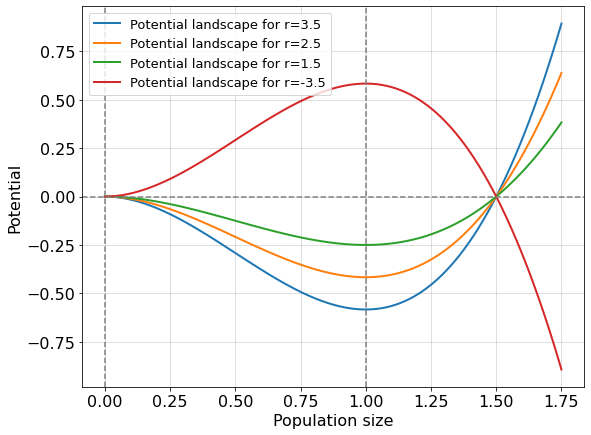

In [235]:
V = lambda x, r, K: r * (x**3 / (3 * K) - x**2 / 2)

x = np.linspace(0, 1.75, 100) #negative population size is non-physical
K = 1

fig, ax = plt.subplots(1, 1, figsize=(9,7))
ax.set_xlabel('Population size')
ax.set_ylabel('Potential')
for r in [3.5, 2.5, 1.5, -3.5]:
    ax.plot(x, V(x, r, K), label=f'Potential landscape for r={r}', lw=2);
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.axvline(1, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper left', fontsize=13);

As we computed in the previous paragraph, for a positive $r$ we have convex potential landscape around the point $x=K$ (attractor) such that any imaginary ball placed at this point returns to it after small perturbation. Moreover, the point $x=0$ reads as unstable, equivalently, potential function around $x=0$ is concave. Hovewer, once a parameter $r$ crosses $0$ towards negative values we observe a completely opposite picture. The point $x=K$ becomes unstable and divides two different regimes: complete decay (left) and unlimited growth (right). Unlimited growth is a new property of this system which initially assumed to model limiting a reproduction capacity. So, possibly negative values of $r$ makes this concrete model non-physical. 

Interestingly that a sequence of parameters $r$ changes the shape of potential function ultimately converting it to the qualitatively different state. In the next paragraph we consider how briefly to describe the stability properties of system with one diagram tracking its journey towards bifurcation.

```{admonition} Exercise
:class: dropdown
Compute a potential function for the equation $\dot{x} = ax^2$? Which type of stability its fixed point has?
```

### Catastrophic bifurcation

Describe model and find critical points
Introduce bifurcation diagram, show catastrophic bifurcation
Say about different types of bifurcations

In this paragraph we develop our first dynamical model of organismal aging. This will be, certainly, a toy model but it helps us to formulate aging problem in the learned dynamical system framework, study its potential functions and get acquainted with a **bifurcation** concept. We develop our model from scratch and step by step, based on techniques we learned above.

First we need to model a growth of an organism. We already know how to do that because the organism is a bag of cells with limited bag sizes. The important difference of a colony of unicellular organisms from a one multicellular is now intercellular communication is of great importance. Following a spirit of previous chapters of this book we will model **biological age** with an evolving system variable $x$. The growth term can be defined as before in the logistic model $(r-x)x$, where $r$ is a growth rate. Note, that the first term models does not contain carrying capacity term explicitly, but you may easily guess that it is equal to $1$, check it out! The second term is something new for us. We want to model costs for intercellular communication which: (i) grow with number of cell as a square of cell number (due to pairwise interactions), (ii) becomes larger with age (change in $\delta$ parameter) due to the increase in number of breakdowns, protein misfoldings and epigenetic alterations within cells, an extracellular matrix degradation, other deregulations which are consequences of the previous two. We propose to model all this stuff with a term $\delta x^2$, where $\delta$ reflects costs related with an organism maintenance. Writing them together we have:

$$
    \dot{x} = (r - x)x + \delta x^2
$$ (eq_aging_dummy)

You may notice some ambiguity of this model. On the one hand, we model biological age $x$, but terms models number of cells and costs on their pairwise communications. The reason is that biological age is actually a **latent variable* describing organism state. This variable may be constructed, in principle, as a combination of other explicit variables that has direct physical meaning. Therefore, latent variable may be correlated with actual number of cells at one time interval and with costs for an organism interval at another time interval. Unfortunately it is very difficult to formulate *aging* as unimodal explicit physical process (otherwise it would have already been done), so it is convenient to use latent representation.

```{admonition} Exercise
:class: dropdown
Compute critical points, potential function and analytical solution for the equation {eq}`eq_aging_dummy`.
```

The fixed points for the equation {eq}`eq_aging_dummy` are:

$$
    \begin{cases}
    x^*_1 = 0 \\
    x^*_2 = \frac{r}{1-\delta}
    \end{cases}
$$

Apparently, something should happens once $\delta$ constant crosses zero. We will study it later, but before let's write an expression for potential function:

$$
    V_\theta(x) = \frac{(1 - \delta) x^3}{3} - \frac{rx^2}{2}  
$$

And the solution for the differential equation is:

$$
    x(t) = \frac{r}{1 - \delta - (1 - \delta - \frac{r}{x_0})e^{-rt}}
$$

As always, firstly draw them in assumption of *non-aging* organism:

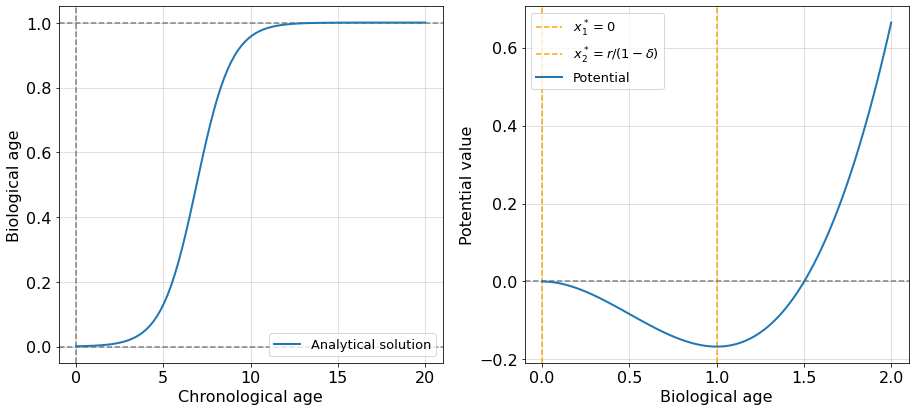

In [236]:
x_sol = lambda x0, t, r, d: r / (1 - d - (1 - d - r/x0)*np.exp(-r*t))
V = lambda x, r, d: (1 - d) * x**3 / 3 - r * x**2 / 2

r, d, c = 1, 0.001, 2.5
x0 = 0.001
t = np.linspace(0, 20, 100)
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots(1, 2, figsize=(13,6))
ax[0].set_xlabel('Chronological age')
ax[0].set_ylabel('Biological age')
ax[0].axhline(0, color='grey', ls='--')
ax[0].axhline(1, color='grey', ls='--')
ax[0].axvline(0, color='grey', ls='--')
ax[0].grid(alpha=0.5)
ax[0].plot(t, x_sol(x0, t, r, d), label=f'Analytical solution', lw=2);
ax[0].legend(loc='lower right', fontsize=13);

ax[1].set_xlabel('Biological age')
ax[1].set_ylabel('Potential value')
ax[1].axvline(0, color='orange', ls='--', label='$x^*_1=0$')
ax[1].axvline(r / (1 - d), color='orange', ls='--', label='$x^*_2=r/(1-\delta)$')
ax[1].axhline(0, color='grey', ls='--')
ax[1].plot(x, V(x, r, d), label=f'Potential', lw=2);
ax[1].grid(alpha=0.5)
ax[1].legend(loc='upper left', fontsize=13);
plt.tight_layout()

For non-aging organism everything looks like in the growth model with scaled biological age instead of population size. We have an attractor in a point $x^*=r/(1 - \delta)$ (which is a minimum of potential function), where $delta$ is a small number reflecting small costs needed for organism maintenance. Let's assume the first intervention. Suppose the costs suddenly increase on a value of $1$ when organism achieved chronological age $19$. To model such intervention it's better to use numerical modelling we learned earlier:

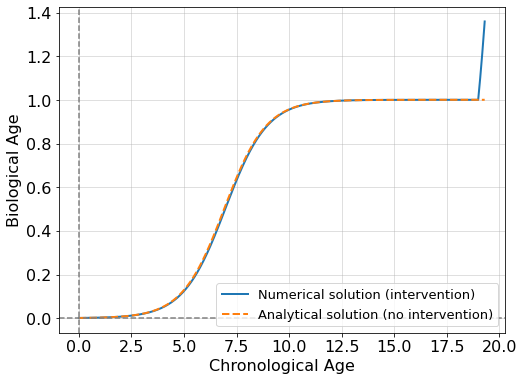

In [237]:
f = lambda x, t, r, d: r * x - (1. - d) * x**2

n = 1000 # number of integration steps
t = np.linspace(0, 19.3, n)
dt = t[1] - t[0] #time difference
r, d = 1., 0.001
x0 = 0.001
x = np.empty(n) #resulting integral
x[0] = x0 # assign initial condition

for i in range(1, n): #integrate from 1-st index
    if t[i] > 19:
        d = 1.001
    x[i] = x[i-1] + f(x[i-1], t[i-1], r, d) * dt

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Chronological Age')
ax.set_ylabel('Biological Age')
ax.plot(t, x, label=f'Numerical solution (intervention)', lw=2);
ax.plot(t, x_sol(x0, t, r, 0.001), label=f'Analytical solution (no intervention)', lw=2, ls='--');
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='lower right', fontsize=13);

Wow, it's super fast! This intervention totally changes the behaviour of the system making it growing. But is it a stable growth? Might it be that the organism just take a new biological age state? The answer not, and to demonstrate it comprehensively we introduce a concept of **bifurcation diagram**.

Bifurcation diagram is a just a plot with all possible $x^*$ depending on some system parameter (from \theta). In our current case, we are interested in parameter $\delta$ whose values determine the qualitative behavior of the system. Often such parameter is also called the **order parameter**. Bifurcation diagram is better to plot by hands if possible.


<img src="https://drive.google.com/uc?id=1u7FV9KT6r0Zvp3eb9H1KyX2TTihbavVs"
     alt="potential" 
     width="500"/>
<p align = "left">
Fig. 2. Bifurcation diagram for the toy aging model.
</p>

The solid blue line on the diagram is a set of stable solutions for the system {eq}`eq_aging_dummy`. The dashed blue line at point $x=0$, otherwise, a set of unstable solutions. The set of initial conditions taken above the stable line result in convergence to the stable solution. The set of initial conditions taken between the stable and the unstable lines result in convergence to the stable solution. Black arrows point the direction of system evolution. When we increase an order parameter $\delta$ starting from $0$ the stable solution increases in magnitude untill we achieve point $\delta_c$ which is a critical threshold after which a bifurcation occurs. After crossing the critical threshold no physical stable solutions remain (here we assume that biological age cannot accept negative values, so red line cannot be a solution) and system is doomed to diverge.

Okay, let's gather two insights from the bifurcation diagram about our model: 

1. It is not necessary to cross the critical threshold to obtain arbitrarily large biological age. It is enough that $\delta$ would be close to $1$.
2. Crossing the threshold guaranties system instability (**catastrophe**) what we can treat as an organism *death*.

The organism can, in principle, live infinitely long with non-increasing $\delta$, but it seems like in real situations delta depends on time $t$ and some interventions than $x$ itself. Let's add this assumption in our model. Let $\delta$ is now a rate of maintenance costs, i.e.:

$$
    \dot{x} = (r - x)x + \delta \cdot t \cdot x^2
$$ (eq_aging_dummy_time)  

We solve this equation numerically, but an analytical solution exists too (try exercise below).

/tmp/ipykernel_151063/1557638224.py:1: RuntimeWarning: overflow encountered in double_scalars
  f = lambda x, t, r, d: r * x - (1. - d * t) * x**2


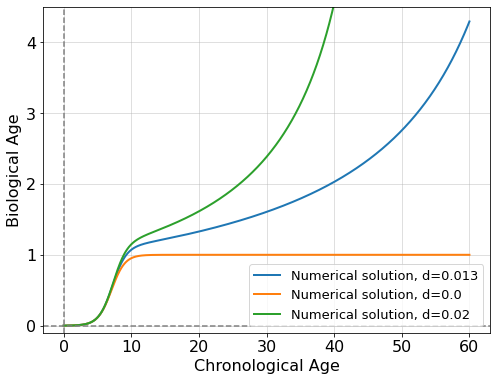

In [264]:
f = lambda x, t, r, d: r * x - (1. - d * t) * x**2

n = 1000 # number of integration steps
t = np.linspace(0, 60, n)
dt = t[1] - t[0] #time difference
r = 1
x0 = 0.001
x = np.empty(n) #resulting integral

fig, ax = plt.subplots(1, 1, figsize=(8,6))
for d in [0.013, 0., 0.02]:
    x[0] = x0 # assign initial condition
    for i in range(1, n): #integrate from 1-st index
        x[i] = x[i-1] + f(x[i-1], t[i-1], r, d) * dt
    ax.plot(t, x, label=f'Numerical solution, d={d}', lw=2);

ax.set_xlabel('Chronological Age')
ax.set_ylabel('Biological Age')

ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.set_ylim([-0.1, 4.5])
ax.legend(loc='lower right', fontsize=13);

At value $d=0.013$ this looks more realistically than the intervention case, we start aging after ending the growth proportially to time. Indeed we grow rapidly at earlier stage of life and, after that, start to age exponentialy by a quadratic increase in costs of system maintenance. It should be emphasized that the resulting model is a toy model and rather serves the purpose of demonstrating how a slight modification of the logistic model can describe biological age. One should maintain a healthy skepticism about all such models and always question their usefulness and plausibility.

```{admonition} Exercise
:class: dropdown
Solve the equation {eq}`eq_aging_dummy_time` analytically and draw a bifurcation diagram (on a sheet of paper). What difference with the initial model?
```

This a good first steps to the world of really complex aging models. But we already can say much even with this *one-dimensional* models. More insights are waiting us in the multidimensional world which we will discuss below.

## System of differential equations

It's time to expand our understanding of dynamical systems to a multidimensional case. We first introduce a new concept of **state vector** $x$ which is a replacement for state variable $x$ used above for unidimensional dynamic systems. State vector is composed from $n$ vector **components** $\{x_i\}_n$ which represents different dynamical variables of a system (organism). State vector, in principle, can be composed from any physiological state variables (blood pressure, body temperature, heart rate, etc.), but it is important to choose such of them which describes the system most "completely". For example, when you try to build a dynamical model of a running human, it is desirable to include heart rate as variable into a state vector. On the other hand, such variable as hair length is apparently redundant to include. The same logic works for a model of aging. When we try to model it on a physiological level, tissue level or molecular level, different variables should be used. However, some models can comprise state variables from different levels of system organization. In this case, we need to bind them properly with functional relations. 

In this section we will consider molecular model of human aging building it based on the concept of **gene regulatory network**, which we discuss below.

### Stability in linear multidimensional case

Linear systems of differential equations allows to model a countless number of complex phenomena. We start with a simple model of gene regulation, which includes feedback control loop (Fig. 3). This is a scalable model proposed in {cite}`chen1999modeling` for modeling a number of genes. We restrict ourselves to a consideration only a one gene-rna-protein cascade where the protein acts as a regulator of the gene transcription.

<img src="https://drive.google.com/uc?id=1cB0GcpKAT1W20GOUMG2na7RMPuaYfM5Q"
     alt="gene regulatory network" 
     width="500"/>
<p align = "left">
Fig. 3. Dynamic system of gene regulation.
</p>

We first write the system of differential equations and explain variables:

$$
     \begin{cases}
          \frac{dr}{dt} = - Vr + Cp  \\
          \frac{dp}{dt} = Lr - Up 
     \end{cases}
$$ (eq_linear_system)

where: 
* $r$ and $p$ are mRNA and protein relative concentrations correspondingly; 
* $V$ - degradation rate of mRNAs;
* $U$ - degradation rate of proteins;
* $L$ - translation rate;
* $C$ - transcription regulation rate. This constant determines a character of feedback loop. The protein is a transcriptional activator if $C>0$ and a repressor if $C<0$.

Let's combine both state variables into a state vector $x = [r, p]^T$ (we will use column notation for vectors). Then the right part of the equation {eq}`eq_linear_system` can be written as a matrix $M$ of coefficients multiplied by the state vector $x$:

$$
     \begin{bmatrix}
          \dot{r}\\
          \dot{p}
     \end{bmatrix}
     =
     \begin{bmatrix}
          -V & C \\
          L & -U
     \end{bmatrix}
     \begin{bmatrix}
          r\\
          p
     \end{bmatrix}
$$

or, in brief:

$$
     \dot{x} = Mx
$$

This system can be solved analytically, but now we use numerical solution with some constants.

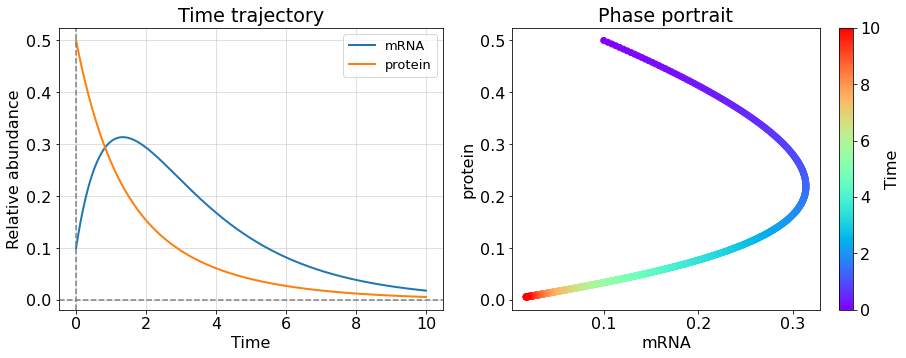

In [365]:
def compute_linear_ODE(t, x0, M):
    f = lambda x, M: M @ x
    dt = t[1] - t[0]
    x = np.empty((2, t.shape[0]))
    x[:, 0] = x0
    for i in range(1, m): #Forward Euler integration
        x[:, i] = x[:, i-1] + dt * f(x[:, i-1], M)
    return x

### SYSTEM MATRIX
V, U, C, L = 0.7, 0.7, 1.0, 0.1
M = np.array([[-V, C], 
              [L, -U]])
###

m = 1000 # number of time steps
t = np.linspace(0, 10, m)
x0 = np.array([0.1, 0.5]) #initial condition

x = compute_linear_ODE(t, x0, M)

def plot_linear_system(t, x, title=''):
    fig, ax = plt.subplots(1, 2, figsize=(13,5.5))
    fig.suptitle(title)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Relative abundance')
    ax[0].set_title('Time trajectory')
    ax[0].plot(t, x[0], label=f'mRNA', lw=2);
    ax[0].plot(t, x[1], label=f'protein', lw=2);
    ax[0].axhline(0, color='grey', ls='--')
    ax[0].axvline(0, color='grey', ls='--')
    ax[0].grid(alpha=0.5)
    ax[0].legend(loc='upper right', fontsize=13);
    sc = ax[1].scatter(x[0], x[1], c=t, cmap='rainbow')
    ax[1].set_title('Phase portrait')
    ax[1].set_xlabel('mRNA')
    ax[1].set_ylabel('protein')
    plt.colorbar(sc, label='Time')
    plt.tight_layout()
    plt.show()

plot_linear_system(t, x)

The constants of matrix $M$ were chosen so that system is stable, but how can we explore the stability in more general way? Previously we have seen that negative system constant $a$ (in the equation $\dot{x} = ax$) guarantees the system converges. Is there the similar property for the matrix $M$ making it "negative"? It turns out it is enough to require real part of all eigenvalues of matrix $M$ to be negative for a system stability. Matrix with all eigenvalues are negative called *negatively-definite matrix*. Let's find eigenvalues of matrix $M$. 

The characteristic equation for matrix M reads as follows:

$$
    \det{(M - \lambda I)} = 
    \begin{vmatrix}
        -V - \lambda & C \\
        L & -U - \lambda
    \end{vmatrix} = 0
$$
$$
    (-V - \lambda)(-U - \lambda) - LC = 0
$$
$$
    \lambda^2 + \lambda (U + V) + UV - LC = 0
$$

Solving this equation for $\lambda$ yields the following expression for eigenvalues:

$$
    \lambda_{1,2} = - \frac{U + V}{2} \pm \frac{\sqrt{(U - V)^2 + 4LC}}{2}
$$

Using the expression for the previous case ($V=0.7$, $U=0.7$, $C=1.0$, $L=0.1$) obtain the eigenvalues $\lambda_1=-0.384$, $\lambda_2=-1.016$ which are both negative and, therefore, system is stable. 

Let's play with the parameters and explore which regimes are possible for the system:

lmb1=(0.3+0j); lmb2=(-1.7-0j)


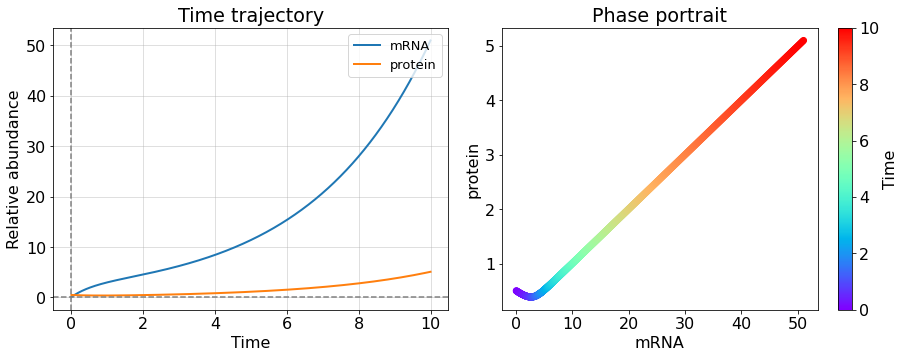

In [391]:
def compute_eigvals(U, V, C, L):
    U, V, C, L = map(np.complex128, [U, V, C, L]) #allows complex eigvals
    return (0.5 * (-(U + V) + np.sqrt((U - V)**2 + 4 * L * C)),
            0.5 * (-(U + V) - np.sqrt((U - V)**2 + 4 * L * C)))

#Case 1: unstable system, mRNA boost (large C)
U, V, C, L = 0.7, 0.7, 10.0, 0.1
eigvals = compute_eigvals(U, V, C, L)
M = np.array([[-U, C], [L, -V]])
x = compute_linear_ODE(t, x0, M)
print(f'lmb1={np.round(eigvals[0], 3)};', f'lmb2={np.round(eigvals[1],3)}')
plot_linear_system(t, x)

lmb1=(0.316+0j); lmb2=(-0.316-0j)


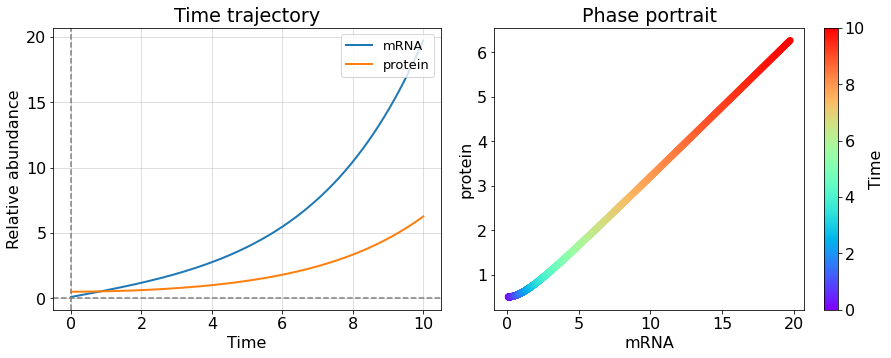

In [392]:
#Case 2: unstable system, no decay (U=0, V=0)
U, V, C, L = 0.0, 0.0, 1.0, 0.1
eigvals = compute_eigvals(U, V, C, L)
M = np.array([[-U, C], [L, -V]])
x = compute_linear_ODE(t, x0, M)
print(f'lmb1={np.round(eigvals[0], 3)};', f'lmb2={np.round(eigvals[1],3)}')
plot_linear_system(t, x)

lmb1=(-0.7+3j); lmb2=(-0.7-3j)


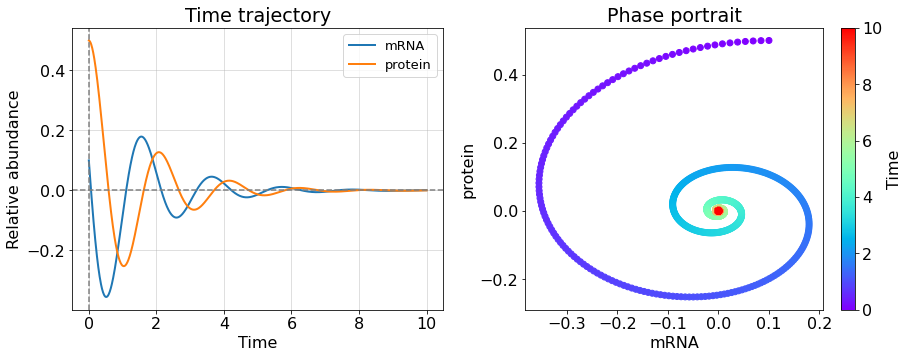

In [398]:
#Case 3: oscillation with decay, suppresion of transcription (C = -L)
U, V, C, L = 0.7, 0.7, -3.0, 3.0
eigvals = compute_eigvals(U, V, C, L)
M = np.array([[-U, C], [L, -V]])
x = compute_linear_ODE(t, x0, M)
print(f'lmb1={np.round(eigvals[0], 3)};', f'lmb2={np.round(eigvals[1],3)}')
plot_linear_system(t, x)

lmb1=(-0.7+0j); lmb2=(-0.7-0j)


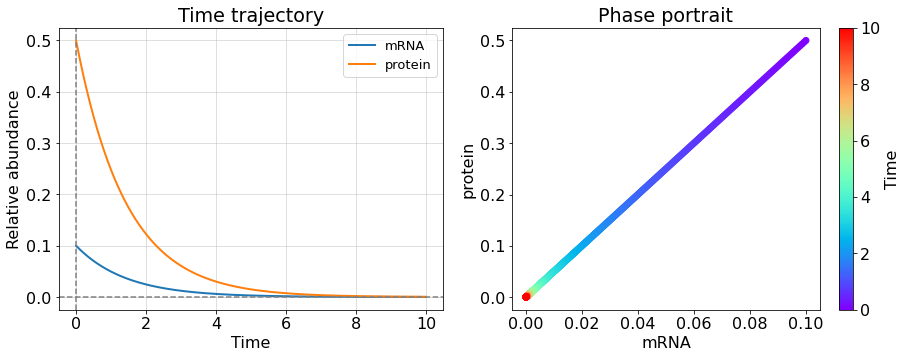

In [397]:
#Case 4: no feedback and translation, radioactive decay (C=L=0)
U, V, C, L = 0.7, 0.7, 0., 0.
eigvals = compute_eigvals(U, V, C, L)
M = np.array([[-U, C], [L, -V]])
x = compute_linear_ODE(t, x0, M)
print(f'lmb1={np.round(eigvals[0], 3)};', f'lmb2={np.round(eigvals[1],3)}')
plot_linear_system(t, x)

Even only one positive eigenvalue makes the system unstable as you could see this from cases 1 and 2 - this is general for system of any dimensionality. The more interesting case appeared before us once eigenvalues have non-zero imaginary part. The system becomes oscillating. Most of biological systems exhibit oscillating behavior (circadian rythm, glycolisis). It is important to note that oscillating systems also can be stable, unstable and meta-stable.

```{admonition} Exercise
:class: dropdown
Create a gene regulatory system with 2 genes (4 equations). Solve it numerically and plot trajectories. Compute eigenvalues numerically with function `numpy.linalg.eigvals`. Try to adjust parameters to make system stable.
```

### Stability in non-linear multidimensional case

### Universality principle



{cite}`gao2016universal`


### Example of complex system aging

## Critical slowing down

# Learn More

[Principles of Biological Design (Lectures)](https://www.youtube.com/playlist?list=PLcv1wv7ZF5IXWunUDAiQym866-MntorVp) \
[Dynamical Systems with Applications using Python](https://link.springer.com/book/10.1007/978-3-319-78145-7)
